## Capital Asset Pricing Model (CAPM)
---

### Key Assumptions

+ Investors select their portfolios in the mean-variance approach.
+ Investors are able to invest in all traded assets.
+ $\mu$ and $\Sigma$ of all traded assets are common among investors.
+ Investors can short-sell assets without limits.
+ Investors can lend and borrow money at the same interest rate $R_f$ without limits.
+ Investors can trade assets without paying any transaction costs or taxes.

### CAPM

$$
 \mu_n = R_f + \beta_n(\mu_{\mathcal{M}}-R_f),\quad n=1,\dots,N,
$$
where $\mu_{\mathcal{M}}=\mathrm{E}[R_{\mathcal{M}}]$ and 
$$
 \beta_n = \frac{\mathrm{Cov}[\tilde R_n,\tilde R_{\mathcal{M}}]}{\mathrm{Var}[\tilde R_{\mathcal{M}}]}.
$$
This $\beta_n$ is called the <font color=red>beta</font>.


In [1]:
import numpy as np
import numpy.linalg as la
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

We load market capitalization data from a CSV file *capm.csv*.

In [2]:
marketcap = pd.read_csv('capm.csv', index_col=0)
R = (marketcap.diff()/marketcap.shift(1))[1:] * 100
R.index = pd.date_range('2014-12-1', periods=R.shape[0], freq='M')

Here we retrieve monthly returns of the market portfolio `TOPIX` and store them in `R_m`. Then we delete the variable `TOPIX` in `R`. In this way, we make `R` contain asset returns only.


In [3]:
R_m = R['TOPIX'].values
del R['TOPIX']
T, N = R.shape

### OLS Estimation of $\beta$
---

Suppose we have the following data sets:

+ Returns on asset $n$ at period $t$ : $R_{n t}$, $(n=1,\dots,N,\ t=1,\dots,T)$
+ Returns on the market portfolio at period $t$: $R_{\mathcal{M} t}$, $(t=1,\dots,T)$
+ Risk-free rate at period $t$: $R_{f t}$, $(t=1,\dots,T)$,

and consider the following regression model:

$$
 \tilde R_{n t} = \alpha_n + \beta_n \tilde R_{\mathcal{M} t} + u_{n t},
$$

where $\tilde R_{n t}=R_{n t}-R_{f t}$ is the excess return on the asset and $u_{n t}$ is the error term.

We estimate ($\alpha_n,\beta_n$) with the <font color=red>ordinary least squares</font> (<font color=red>OLS</font>) estimation.

`lstsq` is a function in the **numpy.linalg** module that compute the ordinary least squares (OLS) estimate of regression coefficients.

Usage: `lstsq(X, y)`
+ `X` - a matrix of independent variables
+ `y` - a vector of the dependent variable

`lstsq` returns a tuple containing estimation results. The first elememt of this tuple is a vector of the OLS esimates.


In [4]:
StockList = R.columns
Coefs = pd.DataFrame([la.lstsq(np.vstack((np.ones(T), R_m)).T, R[Stock], rcond=None)[0] for Stock in StockList], 
                     index=StockList, columns=['$\\alpha$','$\\beta$'])
display(Coefs)

,$\alpha$,$\beta$
Asset1,-0.701532,0.840085
Asset2,1.061923,1.118194
Asset3,-0.651987,1.303542
Asset4,-0.185324,0.539463
Asset5,0.309915,0.539067


`subplots` is an alternative way to produce multiple plots in one figure.

Basic usage: `fig, ax = subplots(number of rows, number of columns)`

Options:

+ `sharex` - let subplots have the common X-axis
+ `sharey` - let subplots have the common Y-axis
+ `facecolor` - background color
+ `figsize` - set the size of the figure

We can add plots, labels, titles and so forth with the object `ax`.

Methods:

+ `.plot()` - add plots
+ `.set_title()` - add the title
+ `.set_xlabel()` - add the label to the X-axis
+ `.set_ylabel()` - add the label to the Y-axis

`tight_layout` makes alignment of subplots *tight*.


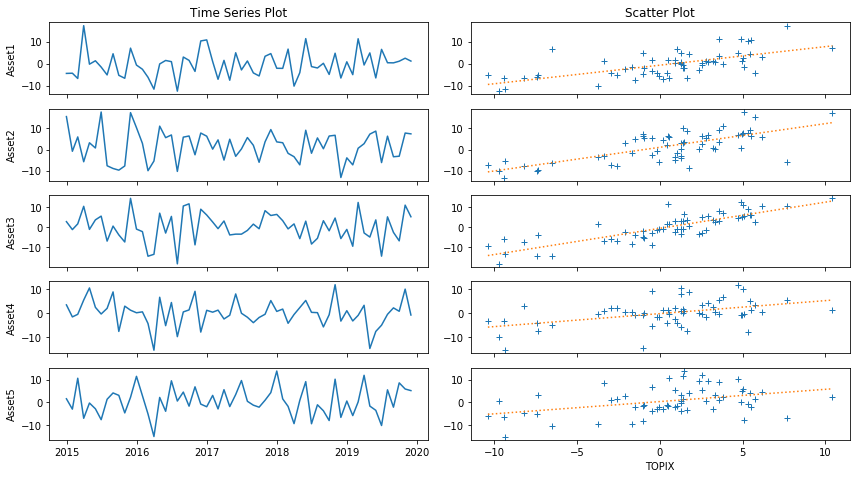

In [5]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
num_grid = 51
X = np.vstack((np.ones(num_grid), np.linspace(R_m.min(),R_m.max(),num_grid))).T
fig, ax = plt.subplots(N, 2, sharex='col', facecolor='w', figsize=(12,6.75))
ax[0, 0].set_title('Time Series Plot')
ax[0, 1].set_title('Scatter Plot')
for index, Stock in enumerate(StockList):
    ax[index, 0].plot(R[Stock])
    ax[index, 0].set_ylabel(Stock)
    ax[index, 1].plot(R_m, R[Stock], '+')
    ax[index, 1].plot(X[:,1], X @ Coefs.values[index, :], ':')
ax[-1, 1].set_xlabel('TOPIX')
plt.tight_layout()
plt.show()